In [1]:
import math
import random as rand
import numpy as np
from typing import Callable , Tuple, List
import matplotlib.pyplot as plt
from numba import njit
from numba.typed import List

In [2]:
@njit
def footman(arr: np.ndarray, sorted_arr: np.ndarray) -> int: 
    return np.sum(np.abs(arr - sorted_arr))

In [3]:
@njit
def insertion_1(arr: np.ndarray) -> List:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    scores.append(footman(arr, np.arange(n)))  # Initial score before sorting

    for outer in range(1, n):
        inner = outer
        while inner > 0 and arr[inner] < arr[inner - 1]:
            arr[inner], arr[inner - 1] = arr[inner - 1], arr[inner]
            inner -= 1

        scores.append(footman(arr, sorted_order))  # Score after completing the outer loop iteration

    return scores


In [4]:
@njit
def insertion_2(arr: np.ndarray) -> List:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()

    scores.append(footman(arr, sorted_order))  # Initial score before sorting

    for outer in range(1, n):
        inner = outer
        temp = arr[inner]

        while inner > 0 and temp < arr[inner - 1]:
            arr[inner] = arr[inner - 1]  # shift right
            inner -= 1

        arr[inner] = temp

        scores.append(footman(arr, sorted_order))  # Record score *after* insertion

    return scores


In [5]:
def sim(iter: int, arr_size: int, seed:int = 10, sort_func: Callable = None)-> Tuple[np.ndarray, List[np.ndarray]]:
    rand.seed(10)
    scores_of_scores = []
    
    for _ in range(iter):
        l = np.arange(arr_size)
        rand.shuffle(l)
        scores = sort_func(l)
        scores_of_scores.append(scores)

    max_len = max(len(s) for s in scores_of_scores)
    padded_scores = np.array([
        np.pad(s, (0, max_len - len(s)), 'edge') for s in scores_of_scores
    ])

    return padded_scores

In [6]:
def calc_worst_score(n: int, m:int):
    count = 0
    if m == 0:
        x_vals = np.arange(1, n + 1)           # [1, 2, ..., n]
        x_vals_rev = x_vals[::-1]             # [n, ..., 2, 1]
        return footman(x_vals_rev, x_vals)    # Compare reversed to sorted
    for _ in range(0,m+1):
        count += abs(n-m-1)
    for i in range(0,n-m-1): # summation from i = 0 to i = n - m - 1
        score = abs(
            n-(2*m)-3-(2*i)
            )
        count += score
    return count 

In [7]:
def plot_algorithms(
    functions: List[Callable],
    names: List[str],
    iter: int,
    arr_size: int,
    seed: int = 10,
    include_worst: bool = True
):
    assert len(functions) == len(names), "Each function must have a corresponding name"

    colors = ['blue', 'green', 'red', 'purple', 'orange']
    x_vals = np.arange(arr_size + 1)
    for i, func in enumerate(functions):
        scores = sim(iter, arr_size, seed=seed, sort_func=func)  # shape: (iter, steps)
        scores_of_scores = np.array(scores)
        steps = np.arange(scores_of_scores.shape[1])

        lower = np.percentile(scores_of_scores, 5, axis=0)
        upper = np.percentile(scores_of_scores, 95, axis=0)
        mean = np.percentile(scores_of_scores, 50, axis=0)

        plt.fill_between(
            steps,
            lower,
            upper,
            color=colors[i % len(colors)],
            alpha=0.2
        )
        plt.plot(
            steps,
            mean,
            color=colors[i % len(colors)],
            label=names[i]
        )

    if include_worst:
        worst_scores = [calc_worst_score(arr_size, m) for m in x_vals]
        worst_scores.pop()
        plt.plot(
            np.arange(arr_size ),
            worst_scores,
            color='black',
            linestyle='--',
            linewidth=2,
            label="Worst-case Spearman Footrule"
        )

    plt.xlabel('Sorting Step')
    plt.ylabel('Score')
    plt.title('Sorting Algorithms Comparison')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.text(
    0.01, 0.01,
    f"Iterations: {iter}",
    transform=plt.gca().transAxes
    )
    plt.tight_layout()
    plt.savefig(f"insertion_plot/insertion_{arr_size}.png")
    plt.show()


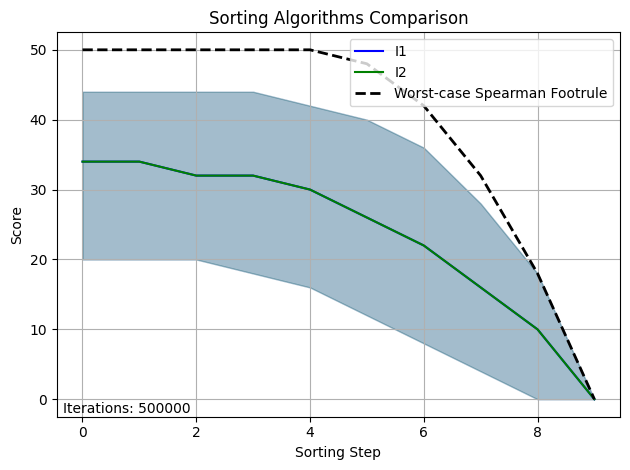

In [8]:
# scores, states = sim(500, 100, seed=10, sort_func=bubble_1)
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                iter=500000,arr_size=10)

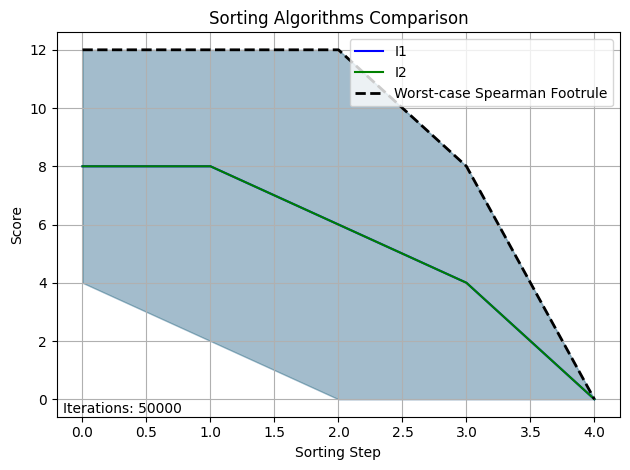

In [9]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                iter=50000,arr_size=5)

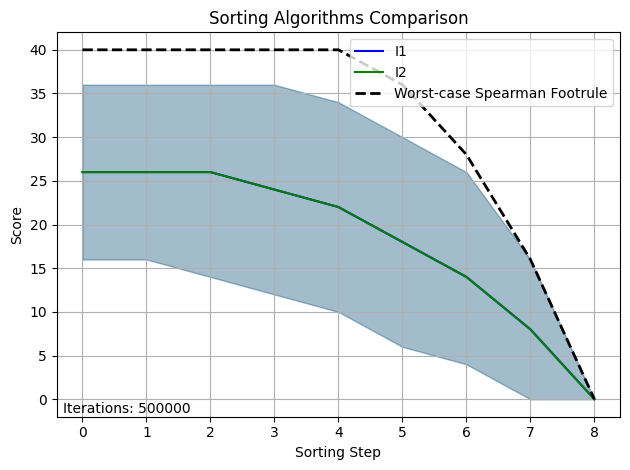

In [10]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                iter=500000,arr_size=9)

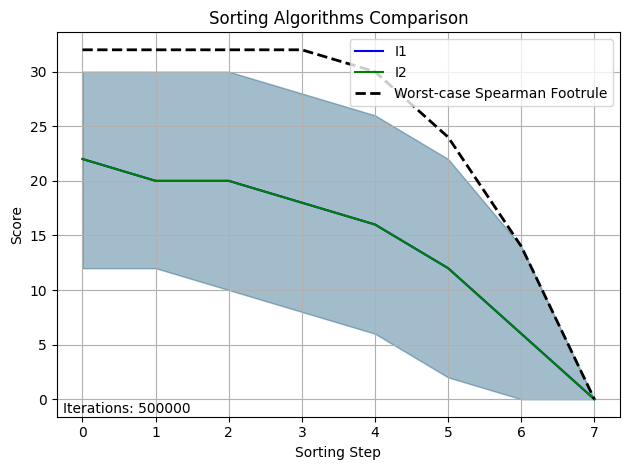

In [11]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                iter=500000,arr_size=8)

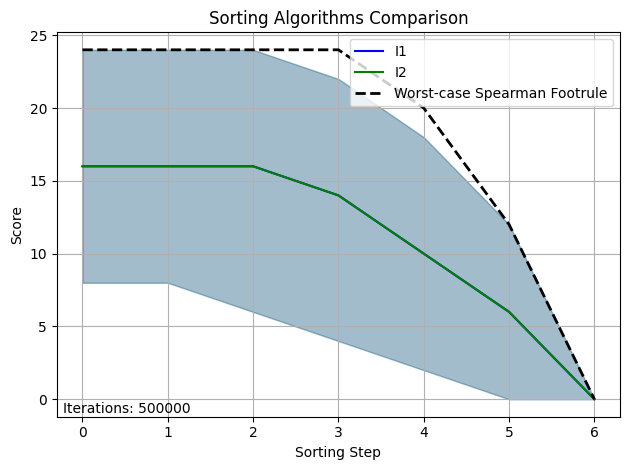

In [12]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                iter=500000,arr_size=7)